In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0 to 1 range)
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train, y_test = to_categorical(y_train), to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def create_mlp(hidden_layers=1, neurons_per_layer=64):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    #Add hidden layers dynamically
    for _ in range(hidden_layers):
        model.add(Dense(neurons_per_layer, activation='relu'))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
depths = [1, 3, 5]  # Number of hidden layers
widths = [32, 64, 128]  # Neurons per layer

history_dict = {}

for d in depths:
    for w in widths:
        print(f"\nTraining MLP with {d} layers and {w} neurons per layer...")
        model = create_mlp(hidden_layers=d, neurons_per_layer=w)
        history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128, verbose=1)
        history_dict[f"{d} layers, {w} neurons"] = history


Training MLP with 1 layers and 32 neurons per layer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7706 - loss: 0.8375 - val_accuracy: 0.9228 - val_loss: 0.2718
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9258 - loss: 0.2646 - val_accuracy: 0.9370 - val_loss: 0.2203
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9430 - loss: 0.2072 - val_accuracy: 0.9454 - val_loss: 0.1826
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9519 - loss: 0.1739 - val_accuracy: 0.9513 - val_loss: 0.1620
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9564 - loss: 0.1513 - val_accuracy: 0.9565 - val_loss: 0.1488
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9605 - loss: 0.1333 - val_accuracy: 0.9569 - val_loss: 0.1394
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9664 - loss: 0.1216 - val_accuracy: 0.9614 - val_loss: 0.1334
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9675 - loss: 0.1125 - val_accuracy: 0.

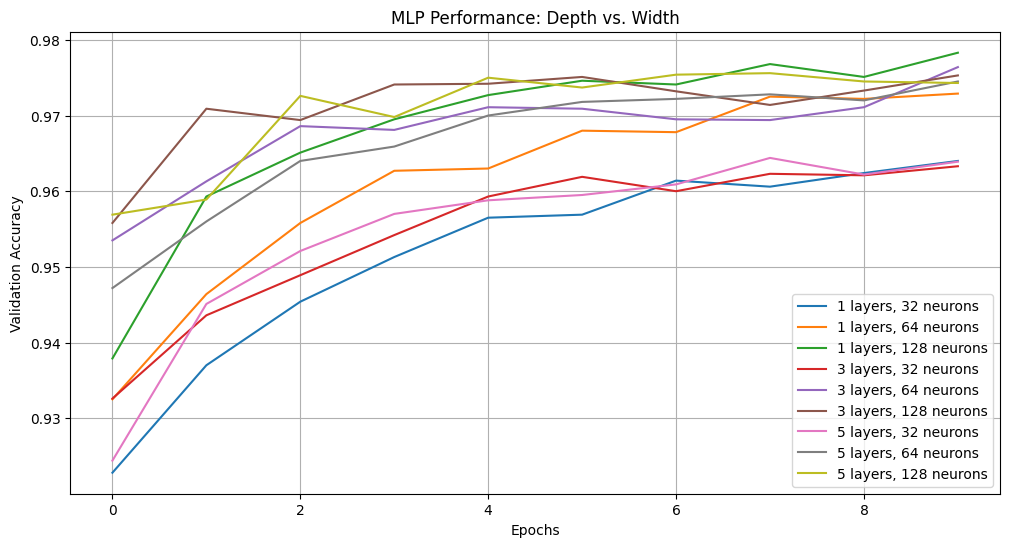

In [ ]:
plt.figure(figsize=(12, 6))

for label, history in history_dict.items():
    plt.plot(history.history['val_accuracy'], label=f"{label}")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("MLP Performance: Depth vs. Width")
plt.legend()
plt.grid()
plt.show()